<a href="https://colab.research.google.com/github/pamruta/Colab/blob/master/Crop-Image-Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

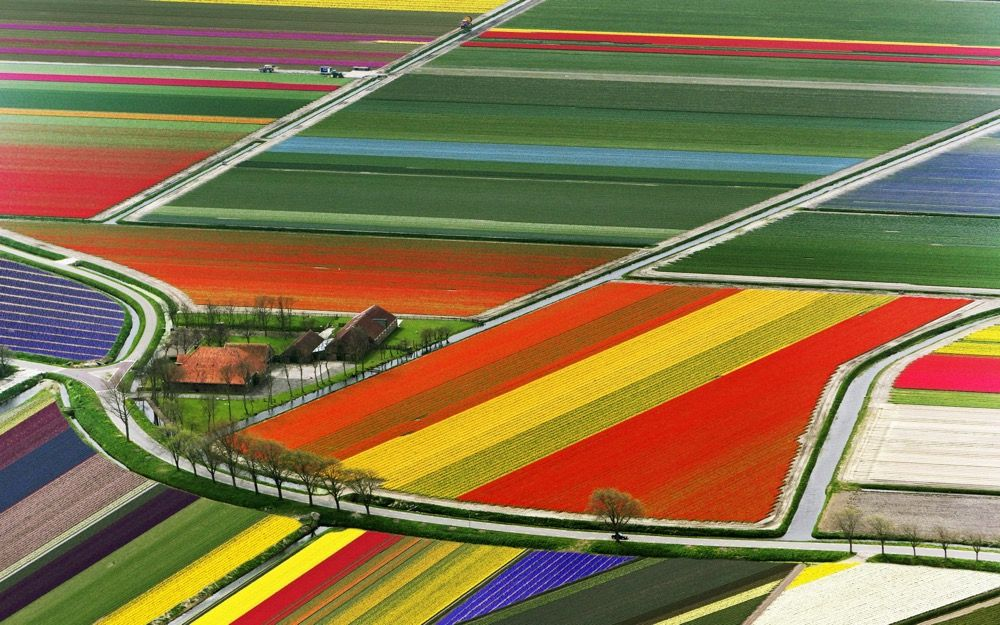

In [2]:
# load input image
image = cv2.imread('test-3.jpg')
cv2_imshow(image)

# Canny Edge Detection

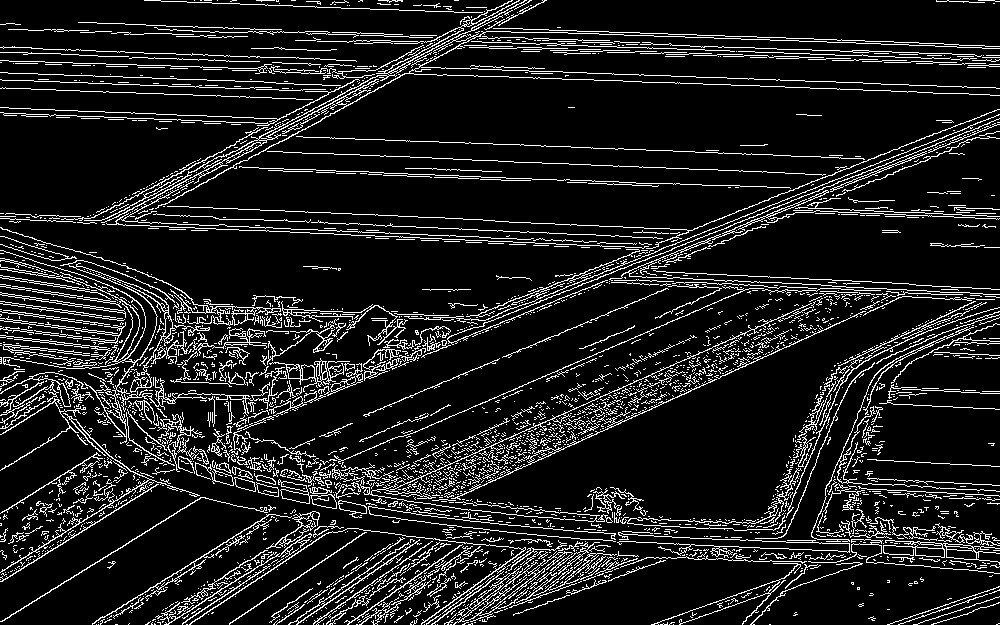

In [3]:
# basic edge detection
edges = cv2.Canny(image, 100, 200)
cv2_imshow(edges)

# **Hough Line Transform** 

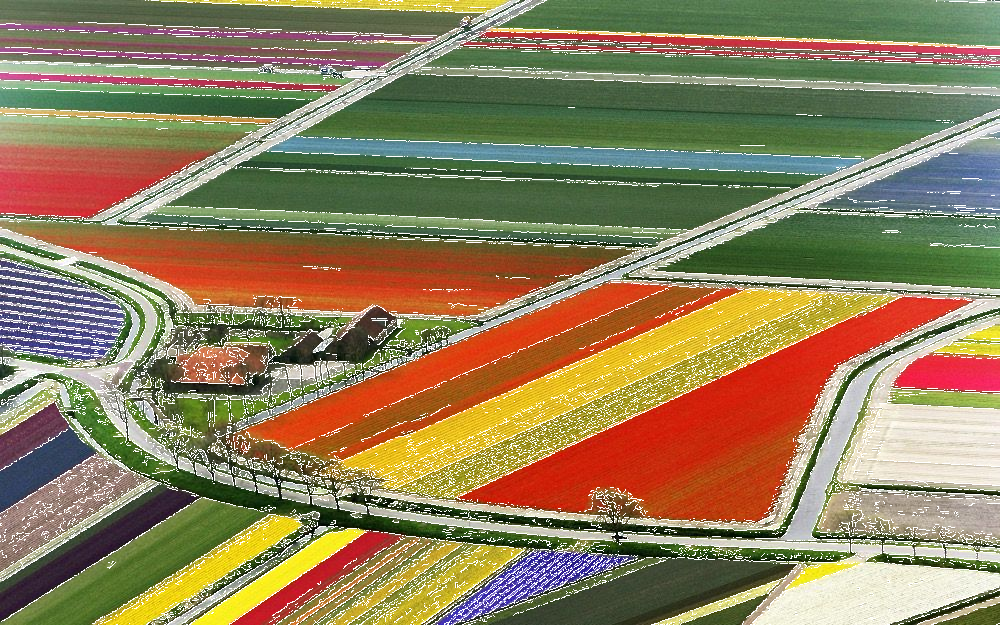

In [4]:
# Hough Line Transform
hough_img = image.copy()
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, 30, -1)
for i in range(len(lines)):
  for x1, y1, x2, y2 in lines[i]:
    cv2.line(hough_img, (x1, y1), (x2, y2), (255, 255, 255), 1)
cv2_imshow(hough_img)

# Drawing Contours

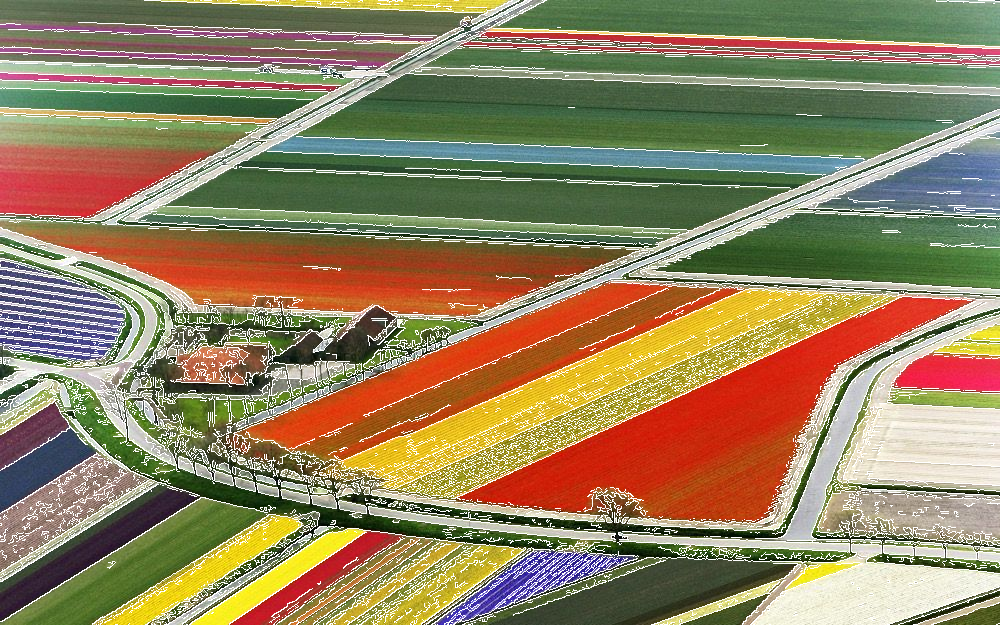

In [5]:
# finding and drawing contours
contour_img = image.copy()
_, contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_img, contours, -1, (255, 255, 255), 1)
cv2_imshow(contour_img)

# K-Means Clustering
- Reducing the number of colors in the image to K

- Mapping each pixel to nearest color

In [0]:
# converting image size from (M x N) x 3 into K x 3 vector
vector = image.reshape((-1, 3))
vector = np.float32(vector)

In [0]:
# k-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 10
attempts = 20
ret, label, center = cv2.kmeans(vector, k, None, criteria, attempts,cv2.KMEANS_RANDOM_CENTERS)

In [0]:
# re-generating image from clustered output
center = np.uint8(center)
result = center[label.flatten()]
cluster_output = result.reshape((image.shape))

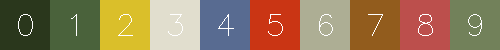

In [9]:
# printing color codes for each cluster segment
color_bar = np.zeros((50, 500, 3), np.uint8)
for i in range(k):
  color_code = center[i].tolist()
  x = i * 50
  y = 0
  cv2.rectangle(color_bar, (x, y), (x+50, y+50), color_code, cv2.FILLED)
  cv2.putText(color_bar, str(i), (x+15, y+35), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255))
cv2_imshow(color_bar)

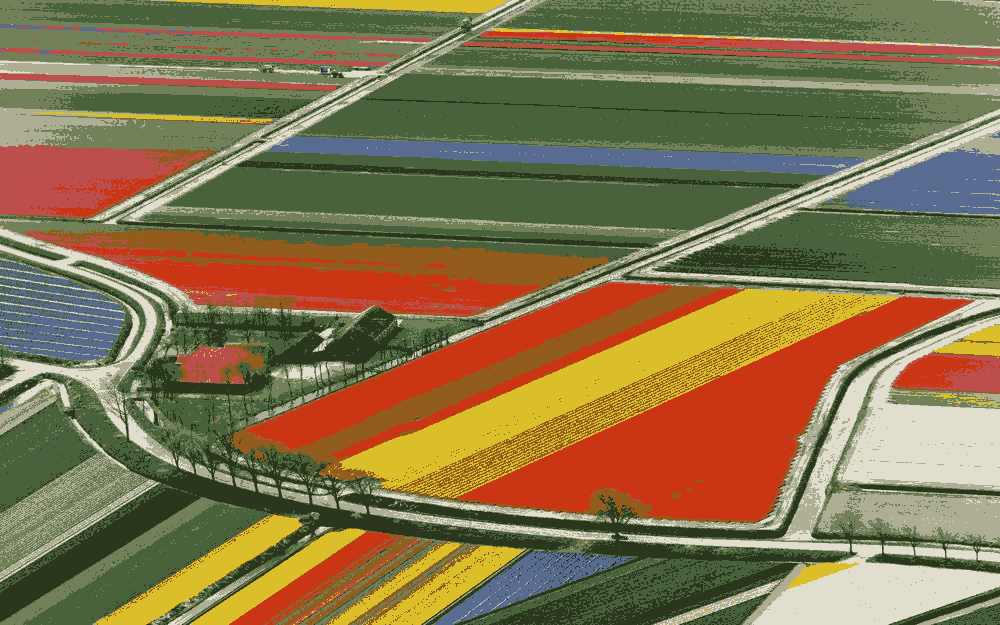

In [10]:
# image after clustering
cv2_imshow(cluster_output)